## data

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df_youtube_playlist = pd.read_csv("youtube_scaping_playlist.csv")
df_youtube_scrolling = pd.read_csv("youtube_scaping_scrolling.csv")

In [3]:
df_youtube_comments = pd.concat([df_youtube_playlist, df_youtube_scrolling], ignore_index=True)
df_youtube_comments = df_youtube_comments.dropna()

In [4]:
df_youtube_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34456 entries, 0 to 34963
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        34456 non-null  object
 1   title      34456 non-null  object
 2   date       34456 non-null  object
 3   views      34456 non-null  object
 4   recommend  34456 non-null  object
 5   contents   34456 non-null  object
 6   reply      34456 non-null  object
dtypes: object(7)
memory usage: 2.1+ MB


In [5]:
df_youtube_comments.isnull().sum()

_id          0
title        0
date         0
views        0
recommend    0
contents     0
reply        0
dtype: int64

In [6]:
df_youtube_comments['date'] = df_youtube_comments['date'].str.replace("ÏµúÏ¥à Í≥µÍ∞ú: ", '', regex=True)
df_youtube_comments['date'] = pd.to_datetime(df_youtube_comments['date'], format='%Y. %m. %d.')
df_youtube_comments['date_year'] = df_youtube_comments['date'].dt.year
df_youtube_comments['date_month'] = df_youtube_comments['date'].dt.month

In [7]:
df_youtube_comments

_id  \
0      6631d19b119b5f09bb9288e4   
1      6631d19b119b5f09bb9288e5   
2      6631d19b119b5f09bb9288e6   
3      6631d19c119b5f09bb9288e7   
4      6631d19c119b5f09bb9288e8   
...                         ...   
34959  6631cc977547545ba205e82c   
34960  6631cc977547545ba205e82d   
34961  6631cc977547545ba205e82e   
34962  6631cc977547545ba205e82f   
34963  6631cc977547545ba205e830   

                                                title       date  \
0      üá∞üá∑ 459Ïùº ÎßåÏóê ÌïúÍµ≠Ïóê ÏôîÎäîÎç∞, Í≥®Î∞© Ïã†ÏÑ∏Î°ú Î≥¥ÎÇ∏ 2Ï£ºÏùºüò∑ [ÏûêÍ∞ÄÍ≤©Î¶¨ vlog] 2020-04-11   
1      üá∞üá∑ 459Ïùº ÎßåÏóê ÌïúÍµ≠Ïóê ÏôîÎäîÎç∞, Í≥®Î∞© Ïã†ÏÑ∏Î°ú Î≥¥ÎÇ∏ 2Ï£ºÏùºüò∑ [ÏûêÍ∞ÄÍ≤©Î¶¨ vlog] 2020-04-11   
2      üá∞üá∑ 459Ïùº ÎßåÏóê ÌïúÍµ≠Ïóê ÏôîÎäîÎç∞, Í≥®Î∞© Ïã†ÏÑ∏Î°ú Î≥¥ÎÇ∏ 2Ï£ºÏùºüò∑ [ÏûêÍ∞ÄÍ≤©Î¶¨ vlog] 2020-04-11   
3      üá∞üá∑ 459Ïùº ÎßåÏóê ÌïúÍµ≠Ïóê ÏôîÎäîÎç∞, Í≥®Î∞© Ïã†ÏÑ∏Î°ú Î≥¥ÎÇ∏ 2Ï£ºÏùºüò∑ [ÏûêÍ∞ÄÍ≤©Î¶¨ vlog] 2020-04-11   
4      üá∞üá∑ 459Ïùº ÎßåÏóê ÌïúÍµ≠Ïóê ÏôîÎäîÎç∞, Í≥®Î∞© Ïã†ÏÑ∏Î°ú Î≥¥ÎÇ∏ 2Ï£ºÏùºüò∑ [ÏûêÍ∞ÄÍ≤©Î¶¨ vlog] 2020-04-11   
...                                               ...        ...   
34959  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§ Í∞ïÏõêÎèÑ Ïó¨Ìñâ 2021-10-09   
34960  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§ Í∞ïÏõêÎèÑ Ïó¨Ìñâ 2021-10-09   
34961  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§ Í∞ïÏõêÎèÑ Ïó¨Ìñâ 2021-10-09   
34962  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§ Í∞ïÏõêÎèÑ Ïó¨Ìñâ 2021-10-09   
34963  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§ Í∞ïÏõêÎèÑ Ïó¨Ìñâ 2021-10-09   

                views recommend  \
0      Ï°∞ÌöåÏàò 2,696,715Ìöå      2.8Îßå   
1      Ï°∞ÌöåÏàò 2,696,715Ìöå      2.8Îßå   
2      Ï°∞ÌöåÏàò 2,696,715Ìöå      2.8Îßå   
3      Ï°∞ÌöåÏàò 2,696,715Ìöå      2.8Îßå   
4      Ï°∞ÌöåÏàò 2,696,715Ìöå      2.8Îßå   
...               ...       ...   
34959     Ï°∞ÌöåÏàò 18,336Ìöå       285   
34960     Ï°∞ÌöåÏàò 18,336Ìöå       285   
34961     Ï°∞ÌöåÏàò 18,336Ìöå       285   
34962     Ï°∞ÌöåÏàò 18,336Ìöå       285   
34963     Ï°∞ÌöåÏàò 18,336Ìöå       285   

                                                contents  \
0      #ÏûêÍ∞ÄÍ≤©Î¶¨Î∏åÏù¥Î°úÍ∑∏ #Ïó¨ÌñâÍ∞Äjay\n---------------------------...   
1      #ÏûêÍ∞ÄÍ≤©Î¶¨Î∏åÏù¥Î°úÍ∑∏ #Ïó¨ÌñâÍ∞Äjay\n---------------------------...   
2      #ÏûêÍ∞ÄÍ≤©Î¶¨Î∏åÏù¥Î°úÍ∑∏ #Ïó¨ÌñâÍ∞Äjay\n---------------------------...   
3      #ÏûêÍ∞ÄÍ≤©Î¶¨Î∏åÏù¥Î°úÍ∑∏ #Ïó¨ÌñâÍ∞Äjay\n---------------------------...   
4      #ÏûêÍ∞ÄÍ≤©Î¶¨Î∏åÏù¥Î°úÍ∑∏ #Ïó¨ÌñâÍ∞Äjay\n---------------------------...   
...                                                  ...   
34959  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§  Í∞ïÏõêÎèÑ Ïó¨...   
34960  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§  Í∞ïÏõêÎèÑ Ïó¨...   
34961  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§  Í∞ïÏõêÎèÑ Ïó¨...   
34962  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§  Í∞ïÏõêÎèÑ Ïó¨...   
34963  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§  Í∞ïÏõêÎèÑ Ïó¨...   

                                                   reply  date_year  \
0      +Ìï¥Îãπ ÏòÅÏÉÅÏóê ÎåÄÌïú ÏàòÏùµÍ∏àÏùò ÏùºÎ∂ÄÎ•º ÎåÄÌïúÎØºÍµ≠ ÏùòÎ£åÏßÑÏóêÍ≤å Í∏∞Î∂ÄÌïòÏòÄÏäµÎãàÎã§.\n\nÏ†êÏ†ê ...       2020   
1      Í∞ÄÏ°±Ïù¥Îùº Íª¥ÏïàÍ≥†ÎèÑÏã∂Í≥† ÌïòÍ≤†ÏßÄÎßå Î©îÎâ¥ÏñºÎåÄÎ°ú Í≥µÌï≠ÏóêÏÑúÎ∂ÄÌÑ∞ Ï≤†Ï†ÄÌïòÍ≤å Í≤©Î¶¨Ï†àÏ∞® Î∞üÎäîÍ≥ºÏ†ïÏùÄ ...       2020   
2      ÌèâÏÜåÏóê Ï°∞Ïπ¥ÌïúÌÖå ÏñºÎßàÎÇò ÏûòÌï¥Ï§´ÏúºÎ©¥ Ï†ÄÎ†áÍ≤å  ÏÇºÏ¥åÏùÑ Ï¢ãÏïÑÌïòÎÉê „Öé„Öé Ï∞∏ Ï¢ãÏùÄÏÇ¨ÎûåÏù¥ÎùºÎäîÍ≤å...       2020   
3      ÏôÄ ÎààÎ¨ºÎÇò... 2:20 ÎÇòÎ•º ÎàÑÍµ¨Î≥¥Îã§ ÏïÑÎÅºÍ≥† ÏûòÎêòÍ∏∏ Î∞îÎùºÎäî Ïö∞Î¶¨Ïùò Î∂ÄÎ™®Îã

## Ï†úÎ™©Ïù¥ Ïú†ÏÇ¨Ìïú Í≤ÉÎì§ÎÅºÎ¶¨ -> ÎåìÍ∏Ä topicÎ∂ÑÏÑù

### title

In [8]:
!pip install python-mecab-ko

In [9]:
from mecab import MeCab
mecab = MeCab()

In [10]:
mecab.pos(df_youtube_comments['title'][13548])

[('üåø', 'SY'),
 ('ÎÇò', 'NP'),
 ('ÌôÄÎ°ú', 'MAG'),
 ('ÎåÄÏ†Ñ', 'NNP'),
 ('ÏóêÏÑú', 'JKB'),
 ('ÌûêÎßÅ', 'NNG'),
 ('Ìïò', 'XSV'),
 ('Í∏∞', 'ETN'),
 ('„Ö£', 'NNG'),
 ('ÎåÄÏ†Ñ', 'NNG'),
 ('ÏùºÏÉÅ', 'NNG'),
 ('Î∏åÏù¥', 'NNG'),
 ('Î°ú', 'JKB'),
 ('Í∑∏', 'MM'),
 ('„Ö£', 'NNG'),
 ('ÎåÄÏ†Ñ', 'NNP'),
 ('ÌïúÏò•', 'NNG'),
 ('Ìà¨Ïñ¥', 'NNG')]

In [11]:
def mecab_tag(text):
    morphs_nouns = []
    morphs_nouns_list = []
    for sentence in text:
        # Î™ÖÏÇ¨
        morphs = [morph for morph, tag in mecab.pos(sentence) if tag in ['NNG', 'NNP']]
        morphs_nouns.append(' '.join(morphs))
    
    return morphs_nouns

In [12]:
morphs_nouns = mecab_tag(df_youtube_comments['title'])

In [13]:
df_youtube_comments['title_noun'] = morphs_nouns

In [14]:
pattern = 'Ïó¨ÌñâÏßÄ|Ïó¨Ìñâ|Î∏åÏù¥Î°úÍ∑∏|Î∏åÏù¥|Î°úÍ∑∏|Íµ≠ÎÇ¥|ÌïúÍµ≠|ÎåÄÌïúÎØºÍµ≠|„Ö£|Ï∂îÏ≤ú'
df_youtube_comments['title_noun'] = df_youtube_comments['title_noun'].str.replace(pattern, '', regex=True)

In [15]:
df_youtube_comments['title_noun']

0                 Í≥®Î∞© Ïã†ÏÑ∏ Ïûê Í≤©Î¶¨
1                 Í≥®Î∞© Ïã†ÏÑ∏ Ïûê Í≤©Î¶¨
2                 Í≥®Î∞© Ïã†ÏÑ∏ Ïûê Í≤©Î¶¨
3                 Í≥®Î∞© Ïã†ÏÑ∏ Ïûê Í≤©Î¶¨
4                 Í≥®Î∞© Ïã†ÏÑ∏ Ïûê Í≤©Î¶¨
                ...         
34959      Í∞ÄÏùÑ ÏòÅÏõî Í≥≥ Î©îÎ∞Ä ÍΩÉ Í∞ïÏõêÎèÑ 
34960      Í∞ÄÏùÑ ÏòÅÏõî Í≥≥ Î©îÎ∞Ä ÍΩÉ Í∞ïÏõêÎèÑ 
34961      Í∞ÄÏùÑ ÏòÅÏõî Í≥≥ Î©îÎ∞Ä ÍΩÉ Í∞ïÏõêÎèÑ 
34962      Í∞ÄÏùÑ ÏòÅÏõî Í≥≥ Î©îÎ∞Ä ÍΩÉ Í∞ïÏõêÎèÑ 
34963      Í∞ÄÏùÑ ÏòÅÏõî Í≥≥ Î©îÎ∞Ä ÍΩÉ Í∞ïÏõêÎèÑ 
Name: title_noun, Length: 34456, dtype: object

- Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑÏóê Ìï¥ÏïºÎê† Í±∞ Í∞ôÏùå -> Ï§ëÎ≥µ ÎßéÏùÑ ÏàòÎ°ù topicÏóê ÏòÅÌñ• Ï§ÑÎìØ

In [16]:
df_youtube_comments_unique = df_youtube_comments.drop_duplicates(subset=['title_noun'])

In [17]:
df_youtube_comments_unique

_id  \
0      6631d19b119b5f09bb9288e4   
200    6631d1ba119b5f09bb9289ac   
360    6631d1d6119b5f09bb928a4c   
560    6631d1f5119b5f09bb928b14   
660    6631d20d119b5f09bb928b78   
...                         ...   
34838  6631cbc67547545ba205e7b3   
34882  6631cbfb7547545ba205e7df   
34894  6631cc2e7547545ba205e7eb   
34909  6631cc617547545ba205e7fa   
34939  6631cc967547545ba205e818   

                                                   title       date  \
0         üá∞üá∑ 459Ïùº ÎßåÏóê ÌïúÍµ≠Ïóê ÏôîÎäîÎç∞, Í≥®Î∞© Ïã†ÏÑ∏Î°ú Î≥¥ÎÇ∏ 2Ï£ºÏùºüò∑ [ÏûêÍ∞ÄÍ≤©Î¶¨ vlog] 2020-04-11   
200       üá∞üá∑ ÌïúÏ†ÅÌïú ÏÑ¨ÎßàÏùÑÏóêÏÑú ÏÉùÌôúÌï¥Î≥¥Í∏∞ (with ÏèòÏù¥, Í≥ΩÌäúÎ∏å, Ïù¥ÎÇòÎûúÎìú) in Í±∞Ï†úÎèÑ 2020-06-26   
360                 üá∞üá∑10Îßå Í∏∞ÎÖê, Î¨¥Í≥ÑÌöçÏúºÎ°ú ÎåÄÏ±Ö ÏóÜÏù¥ Îñ†ÎÇú 10ÏùºÍ∞ÑÏùò Ï†úÏ£º ÏùºÍ∏∞ 2020-10-08   
560                         üá∞üá∑ Ï∂©ÎèôÏ†ÅÏúºÎ°ú Îñ†ÎÇòÎ≤ÑÎ¶∞ ÎåÄÌïúÎØºÍµ≠ ÏÑ¨ Ïó¨Ìñâ EP.0 2020-10-31   
660    üá∞üá∑ Í≥ÑÌöçÌïú Í≥≥ÎßàÎã§ Ï§ÑÏ§ÑÏù¥ Í≤∞Ìï≠ ÌÜµÎ≥¥.. Î∂àÍ∏∏Ìïú ÏÑ¨Ïó¨ÌñâÏùò ÏãúÏûëüõ∂ | 5Î∞ï6Ïùº ÏÑ¨Ïó¨Ìñâ... 2020-11-03   
...                                                  ...        ...   
34838                Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Ï∂îÏ≤ú ÏßÑÏ≤ú Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ ÏïÑÎ¶ÑÎã§Ïö¥ ÏßÑÏ≤ú Ïù¥ÌåùÎÇòÎ¨¥ Í∏∏ Î™ÖÏÜå 2021-05-08   
34882                  Íµ≠ÎÇ¥ Ïó¨ÌñâÏßÄ Ï∂îÏ≤ú ÏòÅÎçï Í∞ÄÎ≥ºÎßåÌïú Í≥≥ ÏòÅÎçïÏóê Ïù¥Îü∞Í≥≥Ïù¥ ÏûàÎã§Í≥†? 2020-11-18   
34894              Ï†úÏ£ºÎèÑÏóê Ïù¥Îü∞Í≥≥Ïù¥? ·Ñå·Ö¶·Ñå·ÖÆÏó¨Ìñâ Ïù∏ÏÉùÏÉ∑ Ïä§Ìåü BEST4 [Íµ≠ÎÇ¥Ïó¨Ìñâ] 2020-02-10   
34909          Ï≤†ÏõêÏùÑ Í∞ÑÎã§Í≥†?? Ïñ∏ÌÉùÌä∏ Ïó¨ÌñâÏßÄ Ï≤†ÏõêÏó¨Ìñâ ÎãπÏùºÏπòÍ∏∞ Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Ï∂îÏ≤ú ÎûúÏÑ†Ïó¨Ìñâ 2020-09-22   
34939     Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§ Í∞ïÏõêÎèÑ Ïó¨Ìñâ 2021-10-09   

                views recommend  \
0      Ï°∞ÌöåÏàò 2,696,715Ìöå      2.8Îßå   
200      Ï°∞ÌöåÏàò 149,739Ìöå      2.2Ï≤ú   
360      Ï°∞ÌöåÏàò 189,800Ìöå      3.9Ï≤ú   
560       Ï°∞ÌöåÏàò 42,027Ìöå        1Ï≤ú   
660       Ï°∞ÌöåÏàò 83,874Ìöå      1.7Ï≤ú   
...               ...       ...   
34838     Ï°∞ÌöåÏàò 22,716Ìöå       375   
34882     Ï°∞ÌöåÏàò 20,399Ìöå       183   
34894     Ï°∞ÌöåÏàò 19,980Ìöå       285   
34909     Ï°∞ÌöåÏàò 19,178Ìöå       287   
34939     Ï°∞ÌöåÏàò 18,336Ìöå       285   

                                                contents  \
0      #ÏûêÍ∞ÄÍ≤©Î¶¨Î∏åÏù¥Î°úÍ∑∏ #Ïó¨ÌñâÍ∞Äjay\n---------------------------...   
200    #Í≥ΩÌäúÎ∏å #ÏèòÏù¥ #Ïù¥ÎÇòÎûúÎìú #Ïó¨ÌñâÍ∞Äjay #Ïó¨ÌñâÏú†ÌäúÎ≤Ñ #Í±∞Ï†úÎèÑ \n---------...   
360    #Ï†úÏ£ºÎ∏åÏù¥Î°úÍ∑∏ #Ïó¨ÌñâÍ∞Ä Ï†úÏù¥\n\nÏò¨Ìï¥ ÏïàÏóê 10ÎßåÏùÑ Îã¨ÏÑ±ÌïòÎäî Í≤å Î™©ÌëúÏòÄÎäîÎç∞\nÏÉùÍ∞Å...   
560    ÏÇ¨Ïã§ Îã§Ïùå Ìï¥Ïô∏ ÏòÅÏÉÅÏù¥ ÌîÑÎûëÏä§ ÌååÎ¶¨Ìé∏Ïù∏Îç∞,\nÌòÑÏû¨ ÌîÑÎûëÏä§Ïùò ÏÉÅÌô©Ïù¥ Ï¢ãÏßÄ ÏïäÏïÑÏÑú ÌååÎ¶¨...   
660    * ÏãúÍ≥Ñ Î¨¥ÏÉÅÏßÄÏõê Ìï¥Ï£ºÏã† 'ÎÖ∏ÎìúÍ∑∏Î¶∞' Í∞êÏÇ¨Ìï©ÎãàÎã§.\nÏó¨Îü¨Î∂Ñ!! ÏïÑÎûò Ìï†Ïù∏ÏΩîÎìú ÏûÖÎ†•Ìïò...   
...                                                  ...   
34838  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Ï∂îÏ≤ú ÏßÑÏ≤ú Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ ÏïÑÎ¶ÑÎã§Ïö¥ ÏßÑÏ≤ú Ïù¥ÌåùÎÇòÎ¨¥ Í∏∏ Î™ÖÏÜå \n\nÏù¥Î≤àÏóê Îñ†ÎÇú...   
34882  Íµ≠ÎÇ¥ Ïó¨ÌñâÏßÄ Ï∂îÏ≤ú ÏòÅÎçï Í∞ÄÎ≥ºÎßåÌïú Í≥≥ ÏòÅÎçïÏóê Ïù¥Îü∞Í≥≥Ïù¥ ÏûàÎã§Í≥†? \n\nÎåÄÍ≤åÏùò Í≥ÑÏ†àÏù¥ ...   
34894  Ï†úÏ£ºÎèÑÏóê Ïù¥Îü∞Í≥≥Ïù¥? ·Ñå·Ö¶·Ñå·ÖÆÏó¨Ìñâ Ïù∏ÏÉùÏÉ∑ Ïä§Ìåü BEST4  [Íµ≠ÎÇ¥Ïó¨Ìñâ]\n\nÏ†úÏ£ºÎèÑÎäî...   
34909  Ï≤†ÏõêÏùÑ Í∞ÑÎã§Í≥†?? Ïñ∏ÌÉùÌä∏ Ïó¨ÌñâÏßÄ Ï≤†ÏõêÏó¨Ìñâ ÎãπÏùºÏπòÍ∏∞ Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Ï∂îÏ≤ú ÎûúÏÑ†Ïó¨Ìñâ\n\nÎ∞©...   
34939  Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ Í∞ÄÏùÑ ÏòÅÏõî Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ BEST 4 Î∂âÏùÄ Î©îÎ∞Ä ÍΩÉÏù¥ ÌîºÏóàÏäµÎãàÎã§  Í∞ïÏõêÎèÑ Ïó¨...   

                                                   reply  date_year  \
0      +Ìï¥Îãπ ÏòÅÏÉÅÏóê ÎåÄÌïú ÏàòÏùµÍ∏àÏùò ÏùºÎ∂ÄÎ•º ÎåÄÌïúÎØºÍµ≠ ÏùòÎ£åÏßÑÏóêÍ≤å Í∏∞Î∂ÄÌïòÏòÄÏäµÎãàÎã§.\n\nÏ†êÏ†ê ...       2020   
200                                     Í∞ÄÏä¥Ïù¥ Îî∞ÎúªÌï¥ÏßÄÎÑ§ Î∞©Íµ¨ÏôÄ Ìï®Íªò       2020   
360                   Ïä§ÌÇµ Ìïú Î≤àÎèÑ ÏïàÌïòÍ≥† Îã§Î≥¥Í≥† ÏôîÏäµÎãàÎã§ :) ÏûêÏ£º Î≥¥Ïûê ÎèôÏÉùÎì§„Öé       2020   
560    ÏÇ¨Ïã§ Îã§Ïùå Ìï¥Ïô∏ 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df_youtube_comments_unique['title_noun'])

In [20]:
# LDA Î™®Îç∏ ÌõàÎ†®
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(features)

LatentDirichletAllocation(n_components=5, random_state=42)

In [21]:
# ÌõàÎ†®Îêú LDA Î™®Îç∏Î°ú Î¨∏ÏÑúÎ≥Ñ ÌÜ†ÌîΩ Ìï†Îãπ
document_topics = lda.transform(features)

In [22]:
# ÌÜ†ÌîΩ Î™®Îç∏ÎßÅ Í≤∞Í≥º Ìï¥ÏÑù
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    # ÌÜ†ÌîΩÎ≥ÑÎ°ú ÏÉÅÏúÑ Îã®Ïñ¥ 10Í∞ú Ï∂úÎ†•
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: Ï≤†Ïõê, ÏòÅÏÉÅ, ÏµúÍ≥†, Ìè¨Ìï≠, Í∞ïÏõêÎèÑ, ÎØºÎ∞ï, ÏûîÎèÑ, Í≥†ÎØº, Ïù∏ÏÉù, ÎìúÎùºÏù¥Î∏å
Topic 1: ÌõÑÌöå, Í∞ÄÏùÑ, ÎãπÏùºÏπòÍ∏∞, Î™ÖÏÜå, ÏΩîÏä§, Î∂ÄÏÇ∞, ÎåÄÏ§ëÍµêÌÜµ, Í∞ïÏõêÎèÑ, Î∞îÎã§, ÌíçÍ≤Ω
Topic 2: Î∂ÄÏÇ∞, Ïô∏Íµ≠, Í∞ÄÏùÑ, Ïó¨Î¶Ñ, Î≤†Ïä§Ìä∏, Î™ÖÏÜå, Îã®Ìíç, Ï∂úÎ†ÅÎã§Î¶¨, ÏÜçÏ¥à, ÏôÑÏ£º
Topic 3: Ï†úÏ£º, ÏÑúÏö∏, Ï†úÏ£ºÎèÑ, Í≤®Ïö∏, Í∑ºÍµê, ÏÇ¨ÏßÑ, ÏãúÍ≥®, ÏÇ¨Ï∞∞, Ïã†ÎπÑ, Ïò¨Î†àÍ∏∏
Topic 4: ÌÜµÏòÅ, Î™ÖÏÜå, Í±∞Ï†ú, ÌéúÏÖò, ÌòºÏûê, ÎØºÎ∞ï, Í∑ºÍµê, ÎåÄÏ†Ñ, ÎãπÏùº, ÎãπÏùºÏπòÍ∏∞


In [23]:
topics_output = lda.transform(features)

In [24]:
df_topics_score = pd.DataFrame(topics_output)

In [25]:
df_youtube_comments_unique['dominant_topic_number']=np.argmax(topics_output, axis=1)

/tmp/ipykernel_49434/1782748319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_comments_unique['dominant_topic_number']=np.argmax(topics_output, axis=1)


In [26]:
df_youtube_comments = pd.merge(df_youtube_comments, df_youtube_comments_unique[['title', 'dominant_topic_number']], on='title', how='left')

In [27]:
df_youtube_comments.query('dominant_topic_number.isnull()')['title'].value_counts()
# ÎÜìÏπòÎ©¥ ÌõÑÌöå -> topic 1Î≤àÏúºÎ°ú Î∂ÑÎ•ò.

title
[SUB]5ÏõîÏóê Ïñ¥ÎîîÍ∞àÏßÄ Í≥†ÎØºÏù¥ÎùºÎ©¥ Ïù¥ ÏòÅÏÉÅ ÌïòÎÇòÎ°ú Í≥†ÎØº Ï¢ÖÍ≤∞        153
6ÏõîÏóê ÎÜìÏπòÎ©¥ ÌõÑÌöåÌïòÎäî Ïó¨ÌñâÏßÄ                          117
7Ïõî, 8Ïõî ÎÜìÏπòÎ©¥ ÌõÑÌöåÌïòÎäî Ïó¨ÌñâÏßÄ 2ÌÉÑ                     51
5ÏõîÏóê ÎÜìÏπòÎ©¥ ÌõÑÌöåÌïòÎäî Ïó¨ÌñâÏßÄ                           36
9ÏõîÏóê ÎÜìÏπòÎ©¥ ÌõÑÌöåÌïòÎäî Ïó¨ÌñâÏßÄ                           31
3ÏõîÏóê ÎÜìÏπòÎ©¥ ÌõÑÌöåÌïòÎäî Î¥ÑÍΩÉ Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ(Ïâø, ÎπÑÎ∞ÄÏù¥ÏóêÏöî!)           31
[SUB]6ÏõîÏóê Ïñ¥ÎîîÍ∞àÏßÄ Í≥†ÎØºÏù¥ÎùºÎ©¥ Ïù¥ ÏòÅÏÉÅ ÌïòÎÇòÎ°ú Í≥†ÎØº Ï¢ÖÍ≤∞         15
Íµ≠ÎÇ¥ Ïó¨Ìñâ Ï∂îÏ≤ú ÎÜìÏπòÎ©¥ ÌõÑÌöåÌï† ÏÉàÎ°úÏö¥ 4Ïõî Î¥Ñ Ïó¨Ìñâ Î™ÖÏÜå BEST 7     13
[SUB]4ÏõîÏóê ÎÜìÏπòÎ©¥ ÌõÑÌöåÌïòÎäî Ïó¨ÌñâÏßÄ(2024)                13
[sub] 3ÏõîÏóê ÎÜìÏπòÎ©¥ ÌõÑÌöåÌïòÎäî Ïó¨ÌñâÏßÄ-ÎåÄÌïúÎØºÍµ≠                11
3Ïõî Íµ≠ÎÇ¥ Ïó¨Ìñâ Ï∂îÏ≤ú ÎÜìÏπòÎ©¥ ÌõÑÌöåÌï† Î¥Ñ Ïó¨Ìñâ Î™ÖÏÜå BEST 10         7
Name: count, dtype: int64

In [28]:
df_youtube_comments['dominant_topic_number'].fillna(1, inplace=True)

/tmp/ipykernel_49434/1473234970.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_youtube_comments['dominant_topic_number'].fillna(1, inplace=True)


In [29]:
df_youtube_comments.isnull().sum()

_id                      0
title                    0
date                     0
views                    0
recommend                0
contents                 0
reply                    0
date_year                0
date_month               0
title_noun               0
dominant_topic_number    0
dtype: int64

In [30]:
df_youtube_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34456 entries, 0 to 34455
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   _id                    34456 non-null  object        
 1   title                  34456 non-null  object        
 2   date                   34456 non-null  datetime64[ns]
 3   views                  34456 non-null  object        
 4   recommend              34456 non-null  object        
 5   contents               34456 non-null  object        
 6   reply                  34456 non-null  object        
 7   date_year              34456 non-null  int32         
 8   date_month             34456 non-null  int32         
 9   title_noun             34456 non-null  object        
 10  dominant_topic_number  34456 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), object(7)
memory usage: 2.6+ MB


In [31]:
df_youtube_comments['dominant_topic_number'] = df_youtube_comments['dominant_topic_number'].astype(int)

### reply

In [32]:
!pip install konlpy

In [33]:
from konlpy.tag import Okt
okt = Okt()

In [34]:
morphs_nouns = mecab_tag(df_youtube_comments['reply'])

In [35]:
df_youtube_comments['reply_clean_mecab'] = morphs_nouns

In [36]:
# Ï°∞ÏÇ¨, Ïñ¥ÎØ∏, Íµ¨ÎëêÏ†ê Í∞ôÏùÄ Í≤ÉÏùÑ Ï†úÍ±∞
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation', 'Adverb', 'Suffix', 'Verb', 'Modifier', 'KoreanParticle', 'Alpha', 'Number', 'Foreign']:
            clean_text.append(word[0])

    return " ".join(clean_text)

In [37]:
df_youtube_comments['reply_clean_okt'] = df_youtube_comments['reply'].apply(okt_clean)

In [38]:
df_youtube_comments['reply_clean_okt'] = df_youtube_comments['reply_clean_okt'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£]", "")

In [39]:
pattern = 'ÌïòÎã§|ÏûàÎã§|Î≥¥Îã§|Í∞ÄÎã§|Ïù¥Îã§|ÏïÑ|Ïù¥|Ï†ú|Ï†Ä|Ïöî|Ïö∏|Îç∞'
patterns = 'Ïó¨ÌñâÏßÄ|Ïó¨Ìñâ|Íµ¨ÎèÖ|Í∞êÏÇ¨|ÏòÅÏÉÅ|Ï†úÏù¥|Ï†ïÎ≥¥|Ïò§Îäò|Î©îÏù¥|ÏÜåÍ∞ú'

df_youtube_comments['reply_clean_okt'] = df_youtube_comments['reply_clean_okt'].str.replace(pattern, '', regex=True)
df_youtube_comments['reply_clean_mecab'] = df_youtube_comments['reply_clean_mecab'].str.replace(patterns, '', regex=True)

In [40]:
df_youtube_comments.isnull().sum()

_id                      0
title                    0
date                     0
views                    0
recommend                0
contents                 0
reply                    0
date_year                0
date_month               0
title_noun               0
dominant_topic_number    0
reply_clean_mecab        0
reply_clean_okt          0
dtype: int64

In [41]:
pattern = 'Ï≤†Ïõê|Ìè¨Ìï≠|Í∞ïÏõêÎèÑ|Í∞ïÏõê|Ïö∏Î¶âÎèÑ|Ìè¨Ìï≠|Î∂ÄÏÇ∞|ÏïàÎèô|ÏÜçÏ¥à|ÏôÑÏ£º|Ïó¨Ïàò|Ïö∏ÏÇ∞|ÏùµÏÇ∞|Ï†úÏ£º|ÏÑúÏö∏|ÌÜµÏòÅ|Í±∞Ï†ú|ÎåÄÏ†Ñ|ÎèÖÎèÑ|Ïèò|Í≥≥|Ïù¥|Îïå|Ï∂îÏ≤ú|ÌÇ¥Ïä§|Î≤à|Í≥Ω|Î©î|Ïú†|Ïù∏|Ï†Ñ|ÎåÄ|ÏÜåÍ∞ú|Íµ≠ÎÇ¥|Í∏∏|Ïñ∏Îãà|ÎùºÏÇ∞|ÏòàÏ≤ú|ÏàúÏ≤ú|Í∞ïÎ¶â|Ïò•Ï≤ú|ÌäúÎ∏å'
df_youtube_comments['reply_clean_mecab_withoutregion'] = df_youtube_comments['reply_clean_mecab'].str.replace(pattern, '', regex=True)

In [42]:
topic0 = df_youtube_comments.query("dominant_topic_number == 0")
topic1 = df_youtube_comments.query("dominant_topic_number == 1")
topic2 = df_youtube_comments.query("dominant_topic_number == 2")
topic3 = df_youtube_comments.query("dominant_topic_number == 3")
topic4 = df_youtube_comments.query("dominant_topic_number == 4")

#### topic0

In [43]:
# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(topic0['reply_clean_mecab'])

In [44]:
lda = LatentDirichletAllocation(n_components=3, random_state=111)
lda.fit(features)

LatentDirichletAllocation(n_components=3, random_state=111)

In [45]:
dictionary_list = vectorizer.get_feature_names_out()

In [46]:
## ÏÉÅÏúÑ Îã®Ïñ¥ Ï∂îÏ∂ú 
## 0 ÌôïÎ•† 1ÏùÄ dictionary
topics_list = list()
for topic in lda.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:4])# ÏãúÎ¶¨Ï¶à ÌòïÏãùÏúºÎ°ú Ï∂úÎ†• get values from series / index 
    print(topics_text)
    topics_list.append(topics_text)
' '.join(df_topics[1].values[:4]) #ÏãúÎ¶¨Ï¶àÎ•º ÌïòÎÇòÏóê Î¨∏Ïû• ÏÉùÏÑ±
topics_list_add = [['Topic0', 'Topic1', 'Topic2'],topics_list]
df_topics_keywords = pd.DataFrame(topics_list_add)
df_topics_keywords.T

ÏÇ¨Îûå Ï∂îÏ≤ú Íµ≠ÎÇ¥ Î∂ÄÏÇ∞
ÏµúÍ≥† ÌûêÎßÅ ÌíçÍ≤Ω ÎçïÎ∂Ñ
Ìè¨Ìï≠ ÏùåÏïÖ ÏòàÏïΩ Í≤ΩÏπò


0            1
0  Topic0  ÏÇ¨Îûå Ï∂îÏ≤ú Íµ≠ÎÇ¥ Î∂ÄÏÇ∞
1  Topic1  ÏµúÍ≥† ÌûêÎßÅ ÌíçÍ≤Ω ÎçïÎ∂Ñ
2  Topic2  Ìè¨Ìï≠ ÏùåÏïÖ ÏòàÏïΩ Í≤ΩÏπò

#### topic1

In [47]:
# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(topic1['reply_clean_mecab'])

In [48]:
lda = LatentDirichletAllocation(n_components=3, random_state=111)
lda.fit(features)

LatentDirichletAllocation(n_components=3, random_state=111)

In [49]:
dictionary_list = vectorizer.get_feature_names_out()

In [50]:
## ÏÉÅÏúÑ Îã®Ïñ¥ Ï∂îÏ∂ú 
## 0 ÌôïÎ•† 1ÏùÄ dictionary
topics_list = list()
for topic in lda.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:4])# ÏãúÎ¶¨Ï¶à ÌòïÏãùÏúºÎ°ú Ï∂úÎ†• get values from series / index 
    print(topics_text)
    topics_list.append(topics_text)
' '.join(df_topics[1].values[:4]) #ÏãúÎ¶¨Ï¶àÎ•º ÌïòÎÇòÏóê Î¨∏Ïû• ÏÉùÏÑ±
topics_list_add = [['Topic0', 'Topic1', 'Topic2'],topics_list]
df_topics_keywords = pd.DataFrame(topics_list_add)
df_topics_keywords.T

ÌûêÎßÅ Í∞ÄÏùÑ ÏùëÏõê ÌíçÍ≤Ω
ÏµúÍ≥† Ïñ∏Îãà Í∏∞ÎåÄ ÎèÑÏõÄ
Î∂ÄÏÇ∞ ÏàúÏ≤ú ÌñâÎ≥µ Í≥†Ìñ•


0            1
0  Topic0  ÌûêÎßÅ Í∞ÄÏùÑ ÏùëÏõê ÌíçÍ≤Ω
1  Topic1  ÏµúÍ≥† Ïñ∏Îãà Í∏∞ÎåÄ ÎèÑÏõÄ
2  Topic2  Î∂ÄÏÇ∞ ÏàúÏ≤ú ÌñâÎ≥µ Í≥†Ìñ•

#### topic2

In [51]:
# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(topic2['reply_clean_mecab'])

In [52]:
lda = LatentDirichletAllocation(n_components=3, random_state=111)
lda.fit(features)

LatentDirichletAllocation(n_components=3, random_state=111)

In [53]:
dictionary_list = vectorizer.get_feature_names_out()

In [54]:
## ÏÉÅÏúÑ Îã®Ïñ¥ Ï∂îÏ∂ú 
## 0 ÌôïÎ•† 1ÏùÄ dictionary
topics_list = list()
for topic in lda.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:4])# ÏãúÎ¶¨Ï¶à ÌòïÏãùÏúºÎ°ú Ï∂úÎ†• get values from series / index 
    print(topics_text)
    topics_list.append(topics_text)
' '.join(df_topics[1].values[:4]) #ÏãúÎ¶¨Ï¶àÎ•º ÌïòÎÇòÏóê Î¨∏Ïû• ÏÉùÏÑ±
topics_list_add = [['Topic0', 'Topic1', 'Topic2'],topics_list]
df_topics_keywords = pd.DataFrame(topics_list_add)
df_topics_keywords.T

Î∂ÄÏÇ∞ ÎÇòÎùº ÏµúÍ≥† ÏãúÍ∞Ñ
Í±¥Í∞ï Ìï¥Ïô∏ Íµ≠ÎÇ¥ ÏòàÏ≤ú
ÌûêÎßÅ Í∞ÄÏùÑ Ï∂îÏ≤ú Ïó¨Ïàò


0            1
0  Topic0  Î∂ÄÏÇ∞ ÎÇòÎùº ÏµúÍ≥† ÏãúÍ∞Ñ
1  Topic1  Í±¥Í∞ï Ìï¥Ïô∏ Íµ≠ÎÇ¥ ÏòàÏ≤ú
2  Topic2  ÌûêÎßÅ Í∞ÄÏùÑ Ï∂îÏ≤ú Ïó¨Ïàò

#### topic3

In [55]:
# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(topic3['reply_clean_mecab'])

In [56]:
lda = LatentDirichletAllocation(n_components=3, random_state=111)
lda.fit(features)

LatentDirichletAllocation(n_components=3, random_state=111)

In [57]:
dictionary_list = vectorizer.get_feature_names_out()

In [58]:
## ÏÉÅÏúÑ Îã®Ïñ¥ Ï∂îÏ∂ú 
## 0 ÌôïÎ•† 1ÏùÄ dictionary
topics_list = list()
for topic in lda.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:4])# ÏãúÎ¶¨Ï¶à ÌòïÏãùÏúºÎ°ú Ï∂úÎ†• get values from series / index 
    print(topics_text)
    topics_list.append(topics_text)
' '.join(df_topics[1].values[:4]) #ÏãúÎ¶¨Ï¶àÎ•º ÌïòÎÇòÏóê Î¨∏Ïû• ÏÉùÏÑ±
topics_list_add = [['Topic0', 'Topic1', 'Topic2'],topics_list]
df_topics_keywords = pd.DataFrame(topics_list_add)
df_topics_keywords.T

Í±¥Í∞ï Ïö∏ÏÇ∞ ÏùµÏÇ∞ Í∏∞Î∂Ñ
ÏÑúÏö∏ Í∏∞ÎåÄ ÏπúÍµ¨ Îã§Ïùå
ÌûêÎßÅ ÏùëÏõê Ï†úÏ£º Ï∂ïÌïò


0            1
0  Topic0  Í±¥Í∞ï Ïö∏ÏÇ∞ ÏùµÏÇ∞ Í∏∞Î∂Ñ
1  Topic1  ÏÑúÏö∏ Í∏∞ÎåÄ ÏπúÍµ¨ Îã§Ïùå
2  Topic2  ÌûêÎßÅ ÏùëÏõê Ï†úÏ£º Ï∂ïÌïò

#### topic4

In [59]:
# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(topic4['reply_clean_mecab'])

In [60]:
lda = LatentDirichletAllocation(n_components=3, random_state=111)
lda.fit(features)

LatentDirichletAllocation(n_components=3, random_state=111)

In [61]:
dictionary_list = vectorizer.get_feature_names_out()

In [62]:
## ÏÉÅÏúÑ Îã®Ïñ¥ Ï∂îÏ∂ú 
## 0 ÌôïÎ•† 1ÏùÄ dictionary
topics_list = list()
for topic in lda.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:4])# ÏãúÎ¶¨Ï¶à ÌòïÏãùÏúºÎ°ú Ï∂úÎ†• get values from series / index 
    print(topics_text)
    topics_list.append(topics_text)
' '.join(df_topics[1].values[:4]) #ÏãúÎ¶¨Ï¶àÎ•º ÌïòÎÇòÏóê Î¨∏Ïû• ÏÉùÏÑ±
topics_list_add = [['Topic0', 'Topic1', 'Topic2'],topics_list]
df_topics_keywords = pd.DataFrame(topics_list_add)
df_topics_keywords.T

ÌÜµÏòÅ ÌûêÎßÅ Íµ≠ÎÇ¥ ÌïúÍµ≠
ÎåÄÏ†Ñ ÏùåÏïÖ Í∞ÄÍ≤© Ï°∞Ïπ¥
Í±¥Í∞ï ÎèÖÎèÑ ÏÇ¨Îûå ÏπúÍµ¨


0            1
0  Topic0  ÌÜµÏòÅ ÌûêÎßÅ Íµ≠ÎÇ¥ ÌïúÍµ≠
1  Topic1  ÎåÄÏ†Ñ ÏùåÏïÖ Í∞ÄÍ≤© Ï°∞Ïπ¥
2  Topic2  Í±¥Í∞ï ÎèÖÎèÑ ÏÇ¨Îûå ÏπúÍµ¨

### Í≤∞Í≥º

[Ï†úÎ™©]
- Topic 0: Ï≤†Ïõê, ÏòÅÏÉÅ, ÏµúÍ≥†, Ìè¨Ìï≠, Í∞ïÏõêÎèÑ, ÎØºÎ∞ï, ÏûîÎèÑ, Í≥†ÎØº, Ïù∏ÏÉù, ÎìúÎùºÏù¥Î∏å
- Topic 1: ÌõÑÌöå, Í∞ÄÏùÑ, ÎãπÏùºÏπòÍ∏∞, Î™ÖÏÜå, ÏΩîÏä§, Î∂ÄÏÇ∞, ÎåÄÏ§ëÍµêÌÜµ, Í∞ïÏõêÎèÑ, Î∞îÎã§, ÌíçÍ≤Ω
- Topic 2: Î∂ÄÏÇ∞, Ïô∏Íµ≠, Í∞ÄÏùÑ, Ïó¨Î¶Ñ, Î≤†Ïä§Ìä∏, Î™ÖÏÜå, Îã®Ìíç, Ï∂úÎ†ÅÎã§Î¶¨, ÏÜçÏ¥à, ÏôÑÏ£º
- Topic 3: Ï†úÏ£º, ÏÑúÏö∏, Ï†úÏ£ºÎèÑ, Í≤®Ïö∏, Í∑ºÍµê, ÏÇ¨ÏßÑ, ÏãúÍ≥®, ÏÇ¨Ï∞∞, Ïã†ÎπÑ, Ïò¨Î†àÍ∏∏
- Topic 4: ÌÜµÏòÅ, Î™ÖÏÜå, Í±∞Ï†ú, ÌéúÏÖò, ÌòºÏûê, ÎØºÎ∞ï, Í∑ºÍµê, ÎåÄÏ†Ñ, ÎãπÏùº, ÎãπÏùºÏπòÍ∏∞

[Topic 0] : Ï≤†Ïõê, Ìè¨Ìï≠, Í∞ïÏõêÎèÑÏùò ÎØºÎ∞ï, ÏûîÎèÑÏôÄ ÎìúÎùºÏù¥Î∏å

|Topic|ÏßÄÏó≠o|ÏßÄÏó≠x|
|--|--|--|
|1|ÏÇ¨Îûå Ï∂îÏ≤ú Íµ≠ÎÇ¥ Î∂ÄÏÇ∞|ÏòàÏïΩ ÎßàÏùå Îã§Ïùå Í≤ΩÏπò|
|2|ÏµúÍ≥† ÌûêÎßÅ ÌíçÍ≤Ω ÎçïÎ∂Ñ|ÏµúÍ≥† ÌûêÎßÅ ÎçïÎ∂Ñ ÌñâÎ≥µ|
|3|Ìè¨Ìï≠ ÏùåÏïÖ ÏòàÏïΩ Í≤ΩÏπò|ÏÇ¨Îûå ÏùëÏõê ÏàòÍ≥† ÏΩîÏä§|

[Topic 1] : Î∂ÄÏÇ∞, Í∞ïÏõêÎèÑÏùò Î∞îÎã§ÏôÄ ÌíçÍ≤Ω, ÎãπÏùºÏπòÍ∏∞ Î™ÖÏÜåÏôÄ ÏΩîÏä§

|Topic|ÏßÄÏó≠o|ÏßÄÏó≠x|
|--|--|--|
|1|ÌûêÎßÅ Í∞ÄÏùÑ ÏùëÏõê ÌíçÍ≤Ω|ÏÇ¨Îûå Í≥†Ìñ• ÏπúÍµ¨ ÏàòÍµ≠|
|2|ÏµúÍ≥† Ïñ∏Îãà Í∏∞ÎåÄ ÎèÑÏõÄ|ÌûêÎßÅ Í∞ÄÏùÑ ÎçïÎ∂Ñ ÌíçÍ≤Ω|
|3|Î∂ÄÏÇ∞ ÏàúÏ≤ú ÌñâÎ≥µ Í≥†Ìñ•|ÏùëÏõê Îã§Ïùå ÏµúÍ≥† ÌïúÍµ≠|

[Topic 2] : Î∂ÄÏÇ∞, ÏÜçÏ¥à, ÏôÑÏ£ºÏùò Í≥ÑÏ†àÎ≥Ñ Î™ÖÏÜå

|Topic|ÏßÄÏó≠o|ÏßÄÏó≠x|
|--|--|--|
|1|Î∂ÄÏÇ∞ ÎÇòÎùº ÏµúÍ≥† ÏãúÍ∞Ñ|ÎèÑÏõÄ ÏµúÍ≥† ÏùëÏõê ÎçïÎ∂Ñ|
|2|Í±¥Í∞ï Ìï¥Ïô∏ Íµ≠ÎÇ¥ ÏòàÏ≤ú|ÌûêÎßÅ Ìï¥Ïô∏ Í±¥Í∞ï ÎÇòÎùº|
|3|ÌûêÎßÅ Í∞ÄÏùÑ Ï∂îÏ≤ú Ïó¨Ïàò|ÌïúÍµ≠ ÌíçÍ≤Ω ÏÑ§Î™Ö Í∞ÄÏùÑ|

[Topic 3] : Ï†úÏ£º, ÏÑúÏö∏Ïùò Í∑ºÍµê, ÏãúÍ≥®, ÏÇ¨Ï∞∞

|Topic|ÏßÄÏó≠o|ÏßÄÏó≠x|
|--|--|--|
|1|Í±¥Í∞ï Ïö∏ÏÇ∞ ÏùµÏÇ∞ Í∏∞Î∂Ñ|ÏãúÍ∞Ñ ÌñâÎ≥µ Í±¥Í∞ï ÎçïÎ∂Ñ|
|2|ÏÑúÏö∏ Í∏∞ÎåÄ ÏπúÍµ¨ Îã§Ïùå|ÏùëÏõê Ï∂ïÌïò Î™®Ïäµ ÏµúÍ≥†|
|3|ÌûêÎßÅ ÏùëÏõê Ï†úÏ£º Ï∂ïÌïò|ÌûêÎßÅ ÏπúÍµ¨ Îã§Ïùå ÏÇ¨Îûå|

[Topic 4] : ÌÜµÏòÅ, Í±∞Ï†ú, ÎåÄÏ†Ñ Í¥ÄÎ†® ÏòÅÏÉÅ

|Topic|ÏßÄÏó≠o|ÏßÄÏó≠x|
|--|--|--|
|1|ÌÜµÏòÅ ÌûêÎßÅ Íµ≠ÎÇ¥ ÌïúÍµ≠|ÌïúÍµ≠ ÏµúÍ≥† ÏπúÍµ¨ ÏòàÏïΩ|
|2|ÎåÄÏ†Ñ ÏùåÏïÖ Í∞ÄÍ≤© Ï°∞Ïπ¥|ÌûêÎßÅ ÏùåÏïÖ Îã§Ïùå ÌíçÍ≤Ω|
|3|Í±¥Í∞ï ÎèÖÎèÑ ÏÇ¨Îûå ÏπúÍµ¨|Í±¥Í∞ï ÏùëÏõê ÌñâÎ≥µ ÎßàÏùå|

- ÏßÄÏó≠ Ïù¥Î¶Ñ Ï†úÏô∏Ïãú Í±∞Ïùò Îã§ Í≤πÏπ®

### wordcloud

In [63]:
# pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [64]:
from wordcloud import WordCloud
from collections import Counter

In [65]:
df_sheets = []
for sheet_name, df in df_youtube_comments['reply_clean_mecab'].items() :
  df_sheets.append(df)

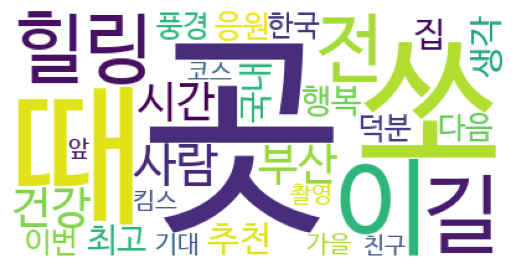

In [66]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [67]:
# df_youtube_comments.to_csv("youtube_comments_concat.csv", index=False)

In [68]:
# df_youtube_comments_unique.to_csv("youtube_comments_unique.csv", index=False)